In [1]:
import requests
import json
import csv
from bs4 import BeautifulSoup

Парсинг информации о персонажах игры Dota2 с сайта dotabuff.com


In [2]:
url = 'https://www.dotabuff.com/heroes'

In [3]:
headers = {'Accept': '*/*',
            'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/104.0.5112.124 YaBrowser/22.9.2.1495 Yowser/2.5 Safari/537.36'}

In [4]:
req = requests.get(url, headers = headers)
src = req.text
print(src)

<!DOCTYPE html><html><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type" /><title>Heroes - All Heroes - DOTABUFF - Dota 2 Stats</title><link rel="stylesheet" media="all" href="/assets/application-4eda62ef6bc2e5ecd478eb8f7881c5fadef9a5c295f8686540d53976853d13bd.css" /><link rel="alternate" type="application/rss+xml" title="RSS" href="https://www.dotabuff.com/blog.rss" /><script src="/assets/application-2eb5371a71e67baa7e7bea4a27560769a1c2d2955662f913736a2dfa242ec384.js"></script><link rel="stylesheet" media="all" href="/packs/clips-5f04b98471ff2e055cba.css" /><script src="/packs/clips-26c69ce08e9eae85a437.js"></script><script src="https://nyx-nyx-nyx.dotabuff.com/cargo.js?upapi=true" type="text/javascript" async="async"></script><meta name="csrf-param" content="authenticity_token" />
<meta name="csrf-token" content="UltCF2ShWMkKBA8eiCWHp4Egfb+/4+x8ZZPW+PDu8kZywAcl3R+BD8Stm7DEh7nbwO01I82ikiFyLQ4ir3pjTQ==" /><meta name="keywords" content="dota 2 statistics, dota 2 sta

In [5]:
with open ('index.html', 'w', encoding = 'utf-8') as file:
    file.write(src)

In [6]:
with open ('index.html', encoding = 'utf-8') as file:
    src = file.read()

In [7]:
soup = BeautifulSoup(src, 'lxml')

In [8]:
all_heroes = soup.find(class_ = 'hero-grid').find_all('a')
all_heroes_dict = {}


In [9]:
for item in all_heroes:
    item_text = item.text
    item_href = 'https://www.dotabuff.com' + item.get('href')
    all_heroes_dict[item_text] = item_href
all_heroes_dict

{'Abaddon ': 'https://www.dotabuff.com/heroes/abaddon',
 'Alchemist ': 'https://www.dotabuff.com/heroes/alchemist',
 'Ancient Apparition ': 'https://www.dotabuff.com/heroes/ancient-apparition',
 'Anti-Mage ': 'https://www.dotabuff.com/heroes/anti-mage',
 'Arc Warden ': 'https://www.dotabuff.com/heroes/arc-warden',
 'Axe ': 'https://www.dotabuff.com/heroes/axe',
 'Bane ': 'https://www.dotabuff.com/heroes/bane',
 'Batrider ': 'https://www.dotabuff.com/heroes/batrider',
 'Beastmaster ': 'https://www.dotabuff.com/heroes/beastmaster',
 'Bloodseeker ': 'https://www.dotabuff.com/heroes/bloodseeker',
 'Bounty Hunter ': 'https://www.dotabuff.com/heroes/bounty-hunter',
 'Brewmaster ': 'https://www.dotabuff.com/heroes/brewmaster',
 'Bristleback ': 'https://www.dotabuff.com/heroes/bristleback',
 'Broodmother ': 'https://www.dotabuff.com/heroes/broodmother',
 'Centaur Warrunner ': 'https://www.dotabuff.com/heroes/centaur-warrunner',
 'Chaos Knight ': 'https://www.dotabuff.com/heroes/chaos-knight',


In [10]:
count = 0
iteration_count = 123


for hero_name, hero_href in all_heroes_dict.items():
    
    hero_name = hero_name.strip()
    req = requests.get(url = hero_href, headers = headers)
    src = req.text
    with open(f'html/{hero_name}.html', 'w', encoding = 'utf-8') as file:
        file.write(src)

    with open(f'html/{hero_name}.html', 'r', encoding = 'utf-8') as file:
        src = file.read()

    soup = BeautifulSoup(src, 'lxml')

    info = soup.find(class_ = 'col-8').find('section')
    most_used_items = soup.find(class_ = 'col-8').find_all('section')
    header = info.find('article').find('table').find('thead').find('tr').find_all('th')
    table = info.find('article').find('table').find('tbody').find_all('tr')

    # функция, находящая секцию с 'Most Used_Items', проверяет все секции, так как\
    # нужная нам может быть на каждый странице в разных местах(из-за рекламы в случайных секциях)
    def find_section(most_used_items):
        for i in range (len(most_used_items)):
            if most_used_items[i].find('header') is not None:
                if most_used_items[i].find('header').text == 'Most Used ItemsThis Week more':
                    return i

    most_used_items = most_used_items[find_section(most_used_items)]
    header_mui = most_used_items.find('header').text
    header_mui = header_mui.split()
    header_mui = header_mui[:3]
    header_mui[2] =header_mui[2].split('T')[0]
    header_mui = (''.join(header_mui)).split()

    head = most_used_items.find('article').find('table').find('thead').find('tr').find_all('th')
    body = most_used_items.find('article').find('table').find('tbody').find_all('tr')

    head_list = []
    for i in head:
        head_list.append(i.text)

    items_info = []
    for i in body:
        items_info.append(i.find_all('td'))

    for i in range(len(items_info)):
        for j in range(len(items_info[i])):
            items_info[i][j] = items_info[i][j].text
    for i in range (len(items_info)):
        items_info[i] = items_info[i][1:]



    #парсим линии

    header_list = []
    for i in header:
        header_list.append(i.text)

    lanes_info = []
    for i in table:
        lanes_info.append(i.find_all('td'))

    for i in range(len(lanes_info)):
        for j in range ((len(lanes_info[i]))):
            lanes_info[i][j] = lanes_info[i][j].text
            if '.' in lanes_info[i][j]:
                lanes_info[i][j] = lanes_info[i][j].replace('.', ',')


    with open(f'csv/{hero_name}.csv', 'w', encoding = 'utf-8', newline = '') as file:
            writer = csv.writer(file, delimiter=';')
            writer.writerow(header_list)

    for j in range(len(lanes_info)):

        with open(f'csv/{hero_name}.csv', 'a', encoding = 'utf-8', newline = '') as file:
            writer = csv.writer(file, delimiter=';')
            writer.writerow( lanes_info[j])

    
    with open(f'csv/{hero_name}.csv', 'a', encoding = 'utf-8', newline = '') as file:
        writer = csv.writer(file, delimiter=';', )
        
        writer.writerows(('',header_mui))
    
    with open(f'csv/{hero_name}.csv', 'a', encoding = 'utf-8', newline = '') as file:
        writer = csv.writer(file, delimiter=';')
        writer.writerow(head_list)
        

    for j in range(len(items_info)):

        with open(f'csv/{hero_name}.csv', 'a', encoding = 'utf-8', newline = '') as file:
            writer = csv.writer(file, delimiter=';')
            writer.writerow( items_info[j])
                
            
            
                
        
    count += 1
    if count == iteration_count:
        break

    

### Для каждого персонажа имеем файл 'heroname.csv' такого вида
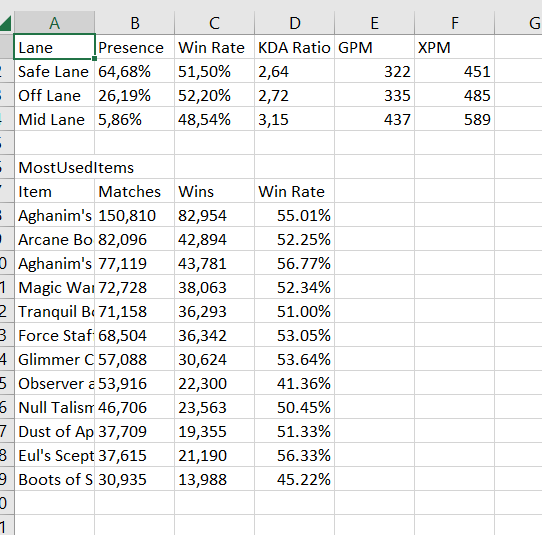